In [1]:
from sympy import symbols, Matrix, Function, init_printing, pprint, trigsimp

init_printing(use_unicode=True)

# Kinematic Models and Constraints

## Representing Robot Position

In [2]:
X_i, Y_i, X_R, Y_R, P = symbols('X_i Y_i X_R Y_R P')
t = symbols("t")

# Define x, y, theta as functions of time
x = Function("x")(t)
y = Function("y")(t)
theta = Function("theta")(t)

dot_X_R = X_R.diff("t")
dot_Y_R = Y_R.diff("t")


# State vector
zeta_I = Matrix([x, y, theta]) # state vector in global frame
dot_zeta_I = zeta_I.diff(t)

In [3]:
from sympy import cos, sin, pi
def rotation_matrix(theta):
    # +ve rotation is clockwise
    R = Matrix([[cos(theta), sin(theta), 0],
                [-sin(theta),  cos(theta), 0],
                [0, 0, 1]])
    return R

R = rotation_matrix(theta)
R_2 = rotation_matrix(pi / 2)

In [4]:
e_1 = Matrix([1, 0, 0])

In [5]:
R_2 * e_1


⎡0 ⎤
⎢  ⎥
⎢-1⎥
⎢  ⎥
⎣0 ⎦

In [6]:
dot_zeta_R = R_2 * dot_zeta_I

In [7]:
dot_zeta_R

⎡d        ⎤
⎢──(y(t)) ⎥
⎢dt       ⎥
⎢         ⎥
⎢ d       ⎥
⎢-──(x(t))⎥
⎢ dt      ⎥
⎢         ⎥
⎢d        ⎥
⎢──(θ(t)) ⎥
⎣dt       ⎦

In [8]:
R_2.inv() * dot_zeta_R

⎡d       ⎤
⎢──(x(t))⎥
⎢dt      ⎥
⎢        ⎥
⎢d       ⎥
⎢──(y(t))⎥
⎢dt      ⎥
⎢        ⎥
⎢d       ⎥
⎢──(θ(t))⎥
⎣dt      ⎦

In [9]:
dot_zeta_I


⎡d       ⎤
⎢──(x(t))⎥
⎢dt      ⎥
⎢        ⎥
⎢d       ⎥
⎢──(y(t))⎥
⎢dt      ⎥
⎢        ⎥
⎢d       ⎥
⎢──(θ(t))⎥
⎣dt      ⎦

## Forward Kinematics Model

In [10]:
# differential drive robot parameters
phi_1 = symbols("phi_1")  # right wheel rotation
phi_2 = symbols("phi_2")  # left wheel rotation
r = symbols("r")          # wheel radius
l = symbols("l")          # half the distance between wheels



In [11]:
# forward axis = x-axis of robot frame
# contribution comes from both wheels
dot_X_R = r * (phi_1 + phi_2) / 2

In [12]:
dot_X_R


In [13]:
# horizontal axis = y-axis of robot frame
# no lateral motion
dot_Y_R = 0

In [14]:
dot_Y_R

In [15]:
# rotational velocity around the center
# difference in wheel rotations
dot_theta = r * (phi_1 - phi_2) / (2 * l)

In [16]:
dot_theta


In [17]:
dot_zeta_R = Matrix([dot_X_R, dot_Y_R, dot_theta])

In [18]:
dot_zeta_R


⎡r⋅(φ₁ + φ₂)⎤
⎢───────────⎥
⎢     2     ⎥
⎢           ⎥
⎢     0     ⎥
⎢           ⎥
⎢r⋅(φ₁ - φ₂)⎥
⎢───────────⎥
⎣    2⋅l    ⎦

In [19]:
R_inv = trigsimp(R.inv())

In [20]:
dot_zeta_I = R_inv * dot_zeta_R
dot_zeta_R = R * dot_zeta_I

In [21]:
trigsimp(dot_zeta_R)

⎡r⋅(φ₁ + φ₂)⎤
⎢───────────⎥
⎢     2     ⎥
⎢           ⎥
⎢     0     ⎥
⎢           ⎥
⎢r⋅(φ₁ - φ₂)⎥
⎢───────────⎥
⎣    2⋅l    ⎦

In [22]:
dot_zeta_I

⎡r⋅(φ₁ + φ₂)⋅cos(θ(t))⎤
⎢─────────────────────⎥
⎢          2          ⎥
⎢                     ⎥
⎢r⋅(φ₁ + φ₂)⋅sin(θ(t))⎥
⎢─────────────────────⎥
⎢          2          ⎥
⎢                     ⎥
⎢     r⋅(φ₁ - φ₂)     ⎥
⎢     ───────────     ⎥
⎣         2⋅l         ⎦

In [23]:
dot_zeta_I\
    .subs(l, 1)\
    .subs(r, 1)\
    .subs(theta, pi/2)\
    .subs(phi_1, 4)\
    .subs(phi_2, 2)

⎡0⎤
⎢ ⎥
⎢3⎥
⎢ ⎥
⎣1⎦

## Wheel kinematic constraints

Assumptions:
- No slipping or skidding of the wheels
- the plan of the wheel is always vertical to the ground
- only 1 single point of contact between the wheel and the ground
- rolling contact
- no lateral slippage

### Fixed standard wheel constraints

- no vertical axis of rotation for steering
- only motion back and forth along the wheel plane

all motion along the direction of the wheel plane must be accompanied by appropriate amount of wheel rotation so that there is no slipping at the contact point

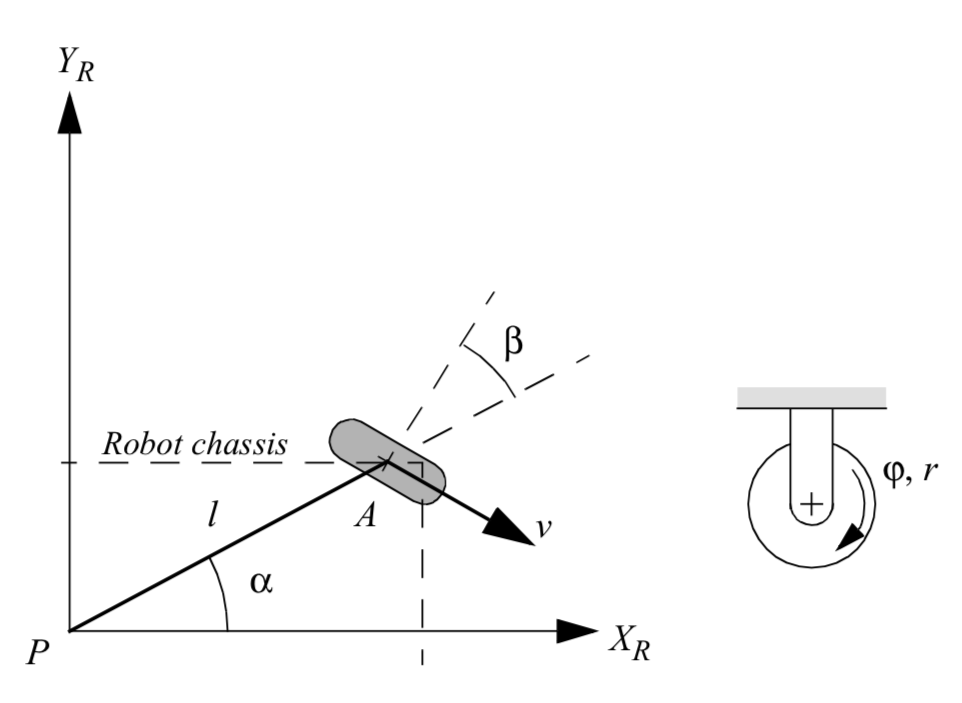

In [24]:
# Fixed wheel parameters
t = symbols("t")
# P is the origin of the robot reference frame
alpha, l = symbols("alpha l")  # polar coordinates of wheel
beta = symbols("beta")  # the angle of the wheel plane relative to robot chassis
r = symbols("r")  # wheel radius
phi = Function("phi")(t)  # wheel rotational position, +ve = clockwise
dot_phi = phi.diff(t)

x, y, theta = Function("x")(t), Function("y")(t), Function("theta")(t)
zeta_I = Matrix([x, y, theta])  # state vector in global frame
dot_zeta_I = zeta_I.diff(t)

In [25]:
Matrix([sin(alpha + beta), -cos(alpha + beta), (-l) * cos(beta)]).transpose()

[sin(α + β)  -cos(α + β)  -l⋅cos(β)]

In [26]:
from sympy import Eq 

dot_zeta_R = R * dot_zeta_I

A = Matrix([[sin(alpha + beta), -cos(alpha + beta), -l * cos(beta)]])
lhs = (A * dot_zeta_R)[0]  # pick the scalar element of the 1x1 matrix

rolling_constraint = Eq(lhs - r * dot_phi, 0)
rolling_constraint

In [27]:
# sliding constraint
dot_zeta_R = R * dot_zeta_I
A = Matrix([[ cos(alpha + beta), sin(alpha + beta), l * sin(beta)]])
lhs = (A * dot_zeta_R)[0]  # pick the scalar element of the 1x1 matrix

sliding_constraint = Eq(lhs, 0)
sliding_constraint

In [28]:
from sympy import solve
dot_phi_solution = solve(rolling_constraint, dot_phi)[0]

In [29]:
dot_phi_solution

### Steering standard wheel constraints
- beta is now a function of time
- dot_beta does not have direct impact on the instantaneous motion constraints of the robot
- lateral velocity at B equals that produced by steering roatation around A

In [30]:
beta = Function("beta")(t)  # now a function of time
dot_beta = beta.diff(t)

In [31]:
dot_zeta_R = R * dot_zeta_I

A = Matrix([[sin(alpha + beta), -cos(alpha + beta), -l * cos(beta)]])
lhs = (A * dot_zeta_R)[0]  # pick the scalar element of the 1x1 matrix

rolling_constraint = Eq(lhs - r * dot_phi, 0)
rolling_constraint


In [32]:
# sliding constraint
dot_zeta_R = R * dot_zeta_I
A = Matrix([[cos(alpha + beta), sin(alpha + beta), l * sin(beta)]])
lhs = (A * dot_zeta_R)[0]  # pick the scalar element of the 1x1 matrix

sliding_constraint = Eq(lhs, 0)
sliding_constraint


### castor wheel constraints
- the vertical axis of rotation does not pass through the ground contact point

In [33]:
dot_zeta_R = R * dot_zeta_I

A = Matrix([[sin(alpha + beta), -cos(alpha + beta), -l * cos(beta)]])
lhs = (A * dot_zeta_R)[0]  # pick the scalar element of the 1x1 matrix

rolling_constraint = Eq(lhs - r * dot_phi, 0)
rolling_constraint


### Swedish wheel constraints

In [34]:
# Time symbol
t = symbols("t")

# --- Wheel & robot parameters ---
wheel_pos_angle, steer_angle, roller_angle = symbols(
    "wheel_pos_angle steer_angle roller_angle"
)  # geometry angles
wheel_base_radius, wheel_radius = symbols(
    "wheel_base_radius wheel_radius"
)  # l, r in your notes

# --- Robot state variables ---
x_robot, y_robot, heading = (
    Function("x_robot")(t),
    Function("y_robot")(t),
    Function("heading")(t),
)
wheel_spin = Function("wheel_spin")(t)  # wheel rotation φ(t)
dot_wheel_spin = wheel_spin.diff(t)

# --- Robot velocity in inertial frame ---
x_dot, y_dot, heading_dot = x_robot.diff(t), y_robot.diff(t), heading.diff(t)
dot_pose_I = Matrix([x_dot, y_dot, heading_dot])

# --- Rotation matrix: from global (I) to robot (R) frame ---
def rotation_matrix(th):
    # +ve rotation is clockwise
    R = Matrix([[cos(th), sin(th), 0], [-sin(th), cos(th), 0], [0, 0, 1]])
    return R


R = rotation_matrix(heading)

# Velocity of robot expressed in robot frame
dot_pose_R = R * dot_pose_I

# ==========================================================
# === Swedish wheel rolling and sliding constraints ========
# ==========================================================

# --- Rolling constraint (Eq. 3.19, rotated by roller_angle) ---
A_roll = Matrix([[ sin(wheel_pos_angle + steer_angle + roller_angle),
                  -cos(wheel_pos_angle + steer_angle + roller_angle),
                  -wheel_base_radius * cos(steer_angle + roller_angle) ]])

lhs_roll = (A_roll * dot_pose_R)[0]
rolling_constraint_sw = Eq(lhs_roll - wheel_radius * dot_wheel_spin * cos(roller_angle), 0)

# --- Sliding (free motion) direction (Eq. 3.20) ---
A_slide = Matrix([[ cos(wheel_pos_angle + steer_angle + roller_angle),
                   sin(wheel_pos_angle + steer_angle + roller_angle),
                   wheel_base_radius * sin(steer_angle + roller_angle) ]])

lhs_slide = (A_slide * dot_pose_R)[0]
sliding_constraint_sw = Eq(lhs_slide - wheel_radius * dot_wheel_spin * sin(roller_angle), 0)

# Display symbolic constraints
rolling_constraint_sw, sliding_constraint_sw

## Robot kinematic models and constraints

The robot body velocity in the global frame, when transformed into the wheel frame, must satisfy each wheel's rolling and sliding constraints.

LHS: robot's chassis movement

RHS: wheel spins to produce that motion

$$
\begin{bmatrix}
J_1(\beta_s) \\
C_1(\beta_s)
\end{bmatrix}
R(\theta)\, \dot{\boldsymbol{\xi}}_I
=
\begin{bmatrix}
J_2\,\dot{\boldsymbol{\phi}} \\
0
\end{bmatrix}
\tag{★}
$$

- $\dot{\boldsymbol{\xi}}_I = [\dot{x}_I,\, \dot{y}_I,\, \dot{\theta}_I]^T$ = robot's velocity in global frame
- $R(\theta)$ = rotation matrix converts global frame to robot's body frame
- $J_1(\beta_s)$ = rolling constraint matrix, depends on steering angles
- $C_1(\beta_s)$ = lateral sliding constraint matrix, depends on steering angles
- $J_2$ = matrix maps wheel angular speed into linear motion at the wheel circumference
- $\dot{\boldsymbol{\phi}}$ = vector of wheel spin rates

The top block $J_1(\beta_s) R(\theta)\dot{\xi}_I = J_2\dot{\phi}$ describes **rolling** (driven) wheels.

The bottom block $C_1(\beta_s)R(\theta)\dot{\xi}_I = 0$ describes **non‑driven** constraints (e.g., directions that can’t move laterally, or passive castors).


Dimension of each matrix:

1. Rotation matrix $R(\theta)$

$$
R(\theta) = 
\begin{bmatrix}
\cos\theta & \sin\theta & 0 \\
-\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

**→Dimension:** $3 \times 3$

---

2. $J_1(\beta_s)$ — Rolling‑Constraint Matrix

- Each **driven wheel** contributes **one scalar rolling constraint**,  
  describing that the wheel rolls without slipping along its own rolling direction.

So for **n₁ driven wheels**, we build an **n₁×3** matrix:

$$
J_1(\beta_s) =
\begin{bmatrix}
\sin(\alpha_1+\beta_1) & -\cos(\alpha_1+\beta_1) & -l\cos(\beta_1)\\[4pt]
\sin(\alpha_2+\beta_2) & -\cos(\alpha_2+\beta_2) & -l\cos(\beta_2)\\
\vdots & \vdots & \vdots
\end{bmatrix}
$$

**→ Dimension:**  $n₁ × 3 $

---

3. $C_1(\beta_s)$ — Sliding‑Constraint Matrix

- Each wheel also imposes at least one **lateral (side‑slip) constraint**:  
  the wheel cannot move sideways (for standard or steered wheels).

If there are **n₂ passive or side‑slip‑constraining conditions**,  
then $ C_1(\beta_s) $ is an **n₂×3** matrix (same idea as $J_1$ but for constrained directions).

**Each row** encodes a direction in the robot frame along which velocity must be zero.

**→ Dimension:** $n₂ × 3$

---

4. $J_2$ — Wheel‑velocity mapping matrix

The right‑hand side connects wheel rotation speeds $ \dot{\boldsymbol{\phi}} $ to the linear velocities at the contact points.

For **n₁ driven wheels**, $ J_2 $ is an **n₁×n** matrix.

Typically $ n₁ = n $ (for fully driven systems), and:

$$
J_2 = r I_{n₁}
$$
if wheel radii are identical (each wheel translates rotation rate into linear speed).

**→ Dimension:** $ n₁ × n $

In [37]:
from sympy import symbols, Function, Matrix, Eq, sin, cos, simplify

class FixedStandardWheel:
    """
    Encapsulates the rolling and sliding (lateral) constraints for a fixed standard wheel.

    Parameters
    ----------
    alpha : sympy.Symbol
        The polar angle of the wheel's contact point (in chassis frame).
    beta : sympy.Symbol
        The orientation angle of the wheel plane relative to chassis X-axis.
    l : sympy.Symbol
        Distance from robot center to wheel contact point.
    r : sympy.Symbol
        Wheel radius.
    R : sympy.Matrix (3x3)
        Rotation matrix from inertial to robot frame.
    x, y, theta : sympy.Function
        State functions (time-dependent) of robot pose.
    phi : sympy.Function
        Wheel rotation angle (time-dependent).
    """

    def __init__(self, alpha, beta, l, r, R, x, y, theta, phi):
        # Store parameters
        self.alpha = alpha
        self.beta = beta
        self.l = l
        self.r = r
        self.R = R
        self.x = x
        self.y = y
        self.theta = theta
        self.phi = phi

        # Define time symbol
        self.t = list(phi.atoms(Function))[0].args[
            0
        ]  # extract the time symbol from phi(t)

        # Define time derivatives
        self.dot_phi = phi.diff(self.t)
        self.zeta_I = Matrix([x, y, theta])
        self.dot_zeta_I = self.zeta_I.diff(self.t)

        # Velocity in robot frame
        self.dot_zeta_R = R * self.dot_zeta_I

        # Construct both constraints
        self.rolling_constraint = self._build_rolling_constraint()
        self.sliding_constraint = self._build_sliding_constraint()

    # ---------------------------------------------------------------
    def _build_rolling_constraint(self):
        """Builds the rolling (no longitudinal slip) constraint."""
        alpha, beta, l, r = self.alpha, self.beta, self.l, self.r
        A = Matrix([[sin(alpha + beta), -cos(alpha + beta), -l * cos(beta)]])
        lhs = (A * self.dot_zeta_R)[0]  # scalar
        return Eq(lhs - r * self.dot_phi, 0)

    # ---------------------------------------------------------------
    def _build_sliding_constraint(self):
        """Builds the lateral (no sideways slip) constraint."""
        alpha, beta, l = self.alpha, self.beta, self.l
        A = Matrix([[cos(alpha + beta), sin(alpha + beta), l * sin(beta)]])
        lhs = (A * self.dot_zeta_R)[0]  # scalar
        return Eq(lhs, 0)

    # ---------------------------------------------------------------
    def constraints(self, simplify_eqs=False):
        """Returns both constraints as a tuple (rolling, sliding)."""
        if simplify_eqs:
            return simplify(self.rolling_constraint), simplify(self.sliding_constraint)
        return self.rolling_constraint, self.sliding_constraint


In [39]:
# Symbols
t = symbols("t")
alpha, beta, l, r = symbols("alpha beta l r")
x, y, theta = Function("x")(t), Function("y")(t), Function("theta")(t)
phi = Function("phi")(t)

# Rotation from inertial → robot frame
R = Matrix([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

# instantiate the wheel 
wheel = FixedStandardWheel(alpha, beta, l, r, R, x, y, theta, phi)

# get constraints 
roll_eq, slide_eq = wheel.constraints(simplify_eqs=True)

In [45]:
class DifferentialDriveRobot:
    """
    Symbolic model of a differential-drive robot using two fixed standard wheels.
    """
    def __init__(self):
        # Define symbols and variables
        t = symbols("t")
        self.t = t
        self.l, self.r = symbols("l r", real=True)
        self.alpha_R, self.alpha_L = 0, 0
        self.beta_R, self.beta_L = 0, 0  # wheel planes aligned with x-axis

        # Robot pose variables
        self.x, self.y, self.theta = (Function("x")(t),
                                     Function("y")(t),
                                     Function("theta")(t))

        # Wheel rotation variables
        self.phi_R = Function("phi_R")(t)
        self.phi_L = Function("phi_L")(t)

        # Rotation from inertial → robot frame
        self.R = Matrix([
            [cos(self.theta), sin(self.theta), 0],
            [-sin(self.theta), cos(self.theta), 0],
            [0, 0, 1]
        ])

        # Create right and left wheel objects
        self.right_wheel = FixedStandardWheel(
            alpha=0, beta=0, l=self.l, r=self.r, R=self.R,
            x=self.x, y=self.y, theta=self.theta, phi=self.phi_R
        )
        self.left_wheel = FixedStandardWheel(
            alpha=0, beta=0, l=-self.l, r=self.r, R=self.R,
            x=self.x, y=self.y, theta=self.theta, phi=self.phi_L
        )

        # Build complete matrices
        self.build_robot_level_constraints()

    # ---------------------------------------------------------------
    def build_robot_level_constraints(self):
        # Rebuild rolling matrix J1 and lateral constraint C1
        l = self.l
        self.J1 = Matrix([[1, 0, l], 
                          [1, 0, -l]])
        self.C1 = Matrix([[0, 1, 0]])

        # Collect wheel angular velocities
        phiR_dot = self.phi_R.diff(self.t)
        phiL_dot = self.phi_L.diff(self.t)
        self.phi_dot = Matrix([phiR_dot, phiL_dot])

        # Build complete equation
        self.J2 = self.r * Matrix.eye(2)
        self.dot_zeta_I = Matrix(
            [self.x.diff(self.t), 
             self.y.diff(self.t), 
             self.theta.diff(self.t)]
        )
        self.dot_zeta_R = self.R * self.dot_zeta_I

        # Left-hand side (LHS)
        top = self.J1 * self.dot_zeta_R
        bottom = self.C1 * self.dot_zeta_R
        self.LHS = Matrix.vstack(top, bottom)

        # Right-hand side (RHS)
        top_rhs = self.J2 * self.phi_dot
        bottom_rhs = Matrix.zeros(1, 1)
        self.RHS = Matrix.vstack(top_rhs, bottom_rhs)

        # Full symbolic form of the constraint equation
        self.constraint_equation = Eq(self.LHS, self.RHS)

    # ---------------------------------------------------------------
    def forward_kinematics(self):
        """Solve for body velocities in the robot frame in terms of wheel speeds."""
        phiR_dot, phiL_dot = self.phi_dot
        v_r = self.r / 2 * (phiR_dot + phiL_dot)
        w_r = self.r / (2 * self.l) * (phiR_dot - phiL_dot)
        # Body-frame velocity vector: [x_dot_R, y_dot_R, theta_dot_R]
        v_body = Matrix([v_r, 0, w_r])
        return v_body.simplify()

    def show_equations(self):
        print("\n=== Differential Drive Robot Constraint Equation ===")
        print(self.constraint_equation)
        print("\nRolling matrix J1:")
        print(self.J1)
        print("\nSliding constraint C1:")
        print(self.C1)
        print("\nRotation matrix R(theta):")
        print(self.R)

In [46]:
robot = DifferentialDriveRobot()
robot.show_equations()

v_body = robot.forward_kinematics()
print("\nForward Kinematics (velocities in robot frame):")
print(v_body)


=== Differential Drive Robot Constraint Equation ===
Eq(Matrix([
[ l*Derivative(theta(t), t) + sin(theta(t))*Derivative(y(t), t) + cos(theta(t))*Derivative(x(t), t)],
[-l*Derivative(theta(t), t) + sin(theta(t))*Derivative(y(t), t) + cos(theta(t))*Derivative(x(t), t)],
[                            -sin(theta(t))*Derivative(x(t), t) + cos(theta(t))*Derivative(y(t), t)]]), Matrix([
[r*Derivative(phi_R(t), t)],
[r*Derivative(phi_L(t), t)],
[                        0]]))

Rolling matrix J1:
Matrix([[1, 0, l], [1, 0, -l]])

Sliding constraint C1:
Matrix([[0, 1, 0]])

Rotation matrix R(theta):
Matrix([[cos(theta(t)), sin(theta(t)), 0], [-sin(theta(t)), cos(theta(t)), 0], [0, 0, 1]])

Forward Kinematics (velocities in robot frame):
None
